In [83]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from tectosaur2.nb_config import setup
setup()
from tectosaur2.mesh import stage1_refine, gauss_rule, pts_grid
from tectosaur2.laplace2d import double_layer, hypersingular

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
t = sp.var('t')
theta = 0.5 * t * sp.pi + 0.5 * sp.pi
x = sp.cos(theta)
y = sp.sin(theta) - 0.5
#x, y = t, sp.sin((t + 1) * 2 * sp.pi)
src, = stage1_refine(
    [(t, x, y)],
    gauss_rule(12),
    max_curvature=2.0
)
src.n_pts

24

/Users/tbent/Dropbox/active/eq/tectosaur2/tectosaur2/laplace2d.py:115: UserWarning: Some integrals diverged because kappa is too small.
  warnings.warn("Some integrals diverged because kappa is too small.")


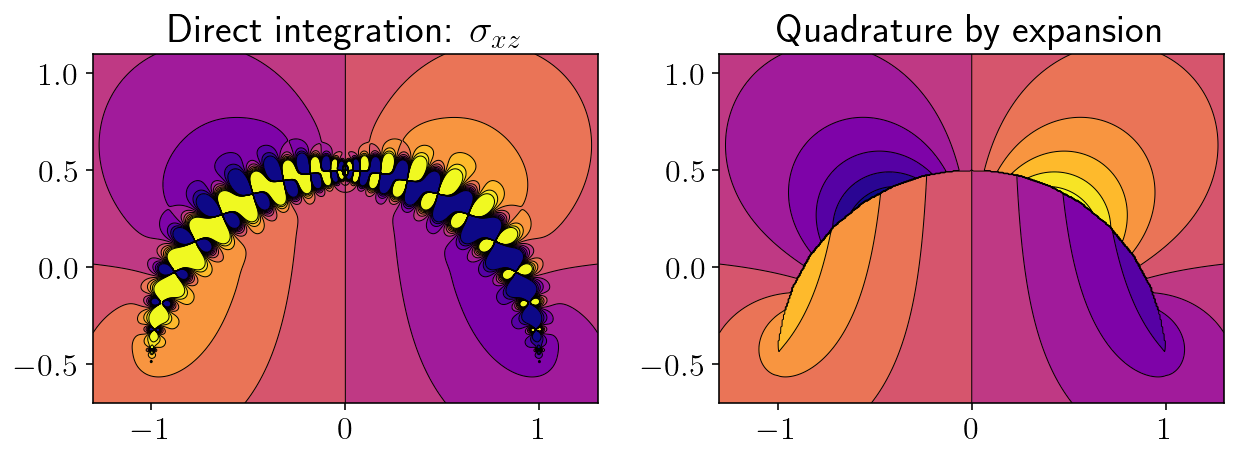

/Users/tbent/Dropbox/active/eq/tectosaur2/tectosaur2/laplace2d.py:115: UserWarning: Some integrals diverged because kappa is too small.
  warnings.warn("Some integrals diverged because kappa is too small.")


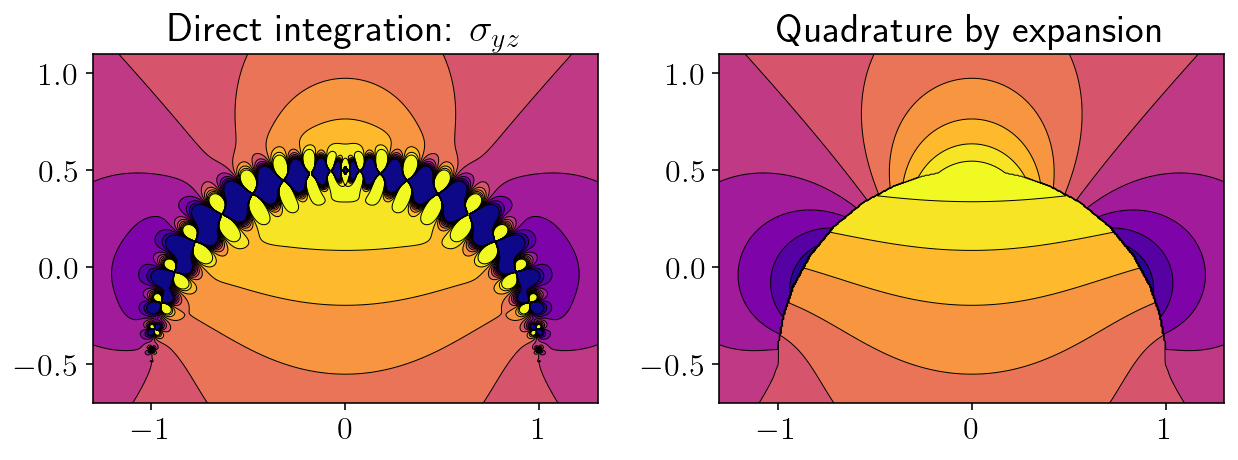

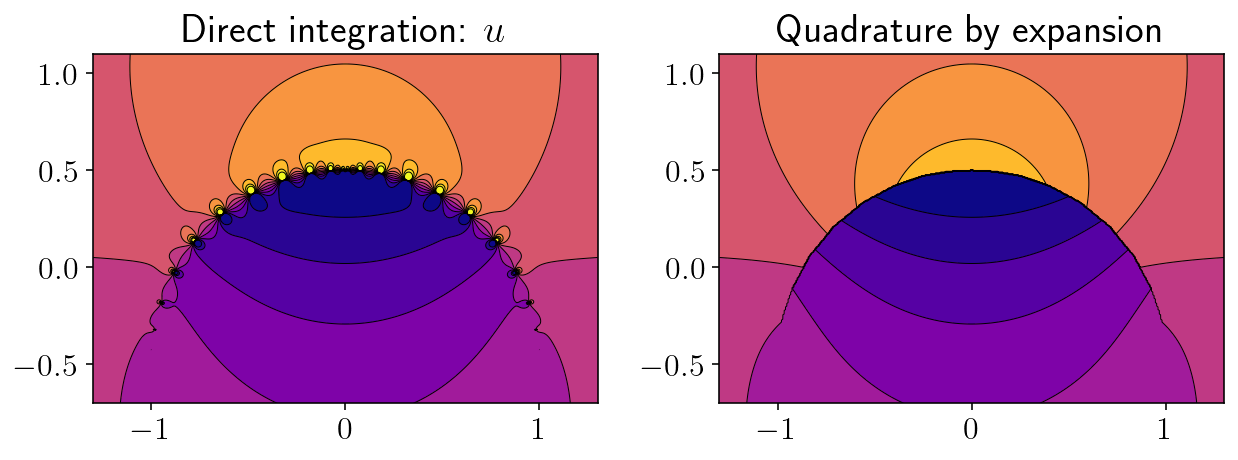

In [105]:
nobs = 400
# zoomx = [0.4, 0.9]
# zoomy = [0, 0.5]
zoomx = [-1.3, 1.3]
zoomy = [-0.7, 1.1]
xs = np.linspace(*zoomx, nobs)
ys = np.linspace(*zoomy, nobs)
obs_pts = pts_grid(xs, ys)


# plt.plot(slip)
# plt.show()
# for K in [double_layer,]
# K = double_layer
for name, latex_name, K, c in [
    ("sigma_xz", "$\sigma_{xz}$", hypersingular, 0),
    ("sigma_yz", "$\sigma_{yz}$", hypersingular, 1),
    ("disp", "$u$", double_layer, 0)
]:
    slip = np.cos(np.pi * src.quad_pts) + 1.0
    I_direct = K.direct(obs_pts, src).dot(slip)
    I_qbx = K.integrate(obs_pts, src).dot(slip)
    obsx = obs_pts[:,0].reshape((nobs, nobs))
    obsy = obs_pts[:,1].reshape((nobs, nobs))
    direct = I_direct[:,c].reshape((nobs, nobs))
    qbx = I_qbx[:,c].reshape((nobs, nobs))

    levels = np.linspace(-1, 1, 11)
    plt.figure(figsize=(9, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Direct integration: {latex_name}")
    cntf = plt.contourf(obsx, obsy, direct, levels=levels, extend="both")
    plt.contour(
        obsx,
        obsy,
        direct,
        colors="k",
        linestyles="-",
        linewidths=0.5,
        levels=levels,
        extend="both",
    )
    #plt.plot(src.pts[:,0], src.pts[:,1], "k-", linewidth=1.5)
    plt.xlim(zoomx)
    plt.ylim(zoomy)
    plt.axis('scaled')

    plt.subplot(1, 2, 2)
    plt.title('Quadrature by expansion')
    cntf = plt.contourf(obsx, obsy, qbx, levels=levels, extend="both")
    plt.contour(
        obsx,
        obsy,
        qbx,
        colors="k",
        linestyles="-",
        linewidths=0.5,
        levels=levels,
        extend="both",
    )
    #plt.colorbar(cntf)
    #plt.plot(src.pts[:,0], src.pts[:,1], "k-", linewidth=1.5)
    plt.axis('scaled')
    plt.xlim(zoomx)
    #plt.ylim(zoomy)
    plt.tight_layout()
    plt.savefig(f'qbx_vs_direct_{name}.png', bbox_inches="tight", pad_inches=0.01, dpi=300)
    plt.show()